# Decisión Tree | Random Fores

In [57]:
# Tratamiento de datos
import numpy as np
import pandas as pd

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

#Modelado y evaluación
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

In [58]:
df_desbal = pd.read_pickle('../archivos/telco_churn_prep.pkl')
df_desbal.head()

,tenure,monthlycharges,totalcharges,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phoneservice_No,...,paperlessbilling_No,paperlessbilling_Yes,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,contract,paymentmethod,churn
0,-1.280248,-1.161694,-0.994194,1,0,0,1,1,0,1,...,0,1,0,0,2,0,0,0,2,No
1,0.064303,-0.260878,-0.173740,0,1,1,0,1,0,0,...,1,0,0,2,0,2,0,1,3,No
2,-1.239504,-0.363923,-0.959649,0,1,1,0,1,0,0,...,0,1,0,2,2,0,0,0,3,Yes
3,0.512486,-0.747850,-0.195248,0,1,1,0,1,0,1,...,1,0,0,2,0,2,2,1,0,No
4,-1.239504,0.196178,-0.940457,1,0,1,0,1,0,0,...,0,1,1,0,0,0,0,0,2,Yes


In [59]:
mapa_churn = {'Yes': 1, 'No': 0}

In [60]:
df_desbal['churn'] = df_desbal['churn'].map(mapa_churn)

In [61]:
df_bal = pd.read_pickle('../archivos/balanceado.pkl')
df_bal.head()

,tenure,monthlycharges,totalcharges,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phoneservice_No,...,paperlessbilling_No,paperlessbilling_Yes,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,contract,paymentmethod,churn
0,-0.383881,0.852677,-0.073259,0,1,0,1,1,0,0,...,0,1,1,0,0,0,0,0,2,0
1,0.023559,0.879269,0.300338,0,1,0,1,1,0,0,...,1,0,1,0,0,0,0,0,2,0
2,1.123646,1.017217,1.556818,0,1,0,1,0,1,0,...,0,1,1,2,0,2,0,1,0,0
3,0.879182,0.711405,0.988591,1,0,0,1,0,1,0,...,0,1,0,0,2,2,2,0,2,0
4,-0.832064,-1.507395,-0.907015,1,0,1,0,1,0,0,...,1,0,2,1,1,1,1,0,0,0


### Decisión Tree:

In [62]:
Xd1 = df_desbal.drop("churn", axis = 1)
yd1 = df_desbal["churn"]

In [63]:
xd_train1, xd_test1, yd_train1, yd_test1 = train_test_split(Xd1, yd1, test_size = 0.2, random_state = 42)

In [64]:
arbol1 = DecisionTreeClassifier(random_state =0)

In [65]:
arbol1.fit(xd_train1, yd_train1)

DecisionTreeClassifier(random_state=0)

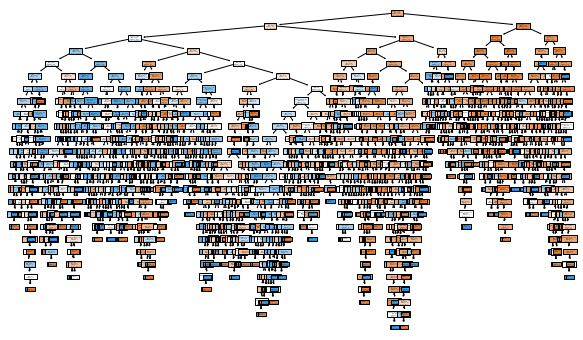

In [66]:
fig = plt.figure(figsize = (10,6))

tree.plot_tree(arbol1, feature_names = xd_train1.columns, filled = True)

plt.show()

In [67]:
max_features = np.sqrt(len(xd_train1.columns))
max_features

5.0990195135927845

In [68]:
print(arbol1.tree_.max_depth)

25


In [69]:
yd_pred_test_esta = arbol1.predict(xd_test1)
yd_pred_train_esta = arbol1.predict(xd_train1)

In [70]:
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)
    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train],
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train],
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    df["modelo"] = modelo
    return df

In [71]:
dtd_results1 = metricas(yd_test1, yd_pred_test_esta, yd_train1, yd_pred_train_esta, "D.Tree desbalanceado I")
dtd_results1

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.739872,0.509901,0.550802,0.529563,0.350168,test,D.Tree desbalanceado I
1,0.997333,0.998652,0.991304,0.994965,0.993151,train,D.Tree desbalanceado I


*El valor de kapppa es muy bajo, indicandonos que nuestro modelo está acertando por puro azar*
- Probamos primero a hacer el modelo con los datos balanceados:

In [72]:
Xb1 = df_bal.drop("churn", axis = 1)
yb1 = df_bal["churn"]

In [73]:
xb_train1, xb_test1, yb_train1, yb_test1 = train_test_split(Xb1, yb1, test_size = 0.2, random_state = 42)

In [74]:
arbol2 = DecisionTreeClassifier(random_state =0)

In [75]:
arbol2.fit(xb_train1, yb_train1)

DecisionTreeClassifier(random_state=0)

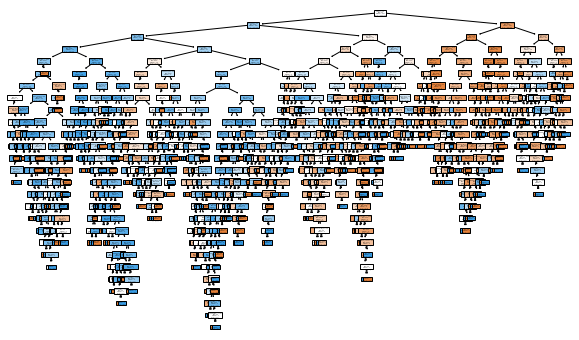

In [76]:
fig = plt.figure(figsize = (10,6))

tree.plot_tree(arbol2, feature_names = xb_train1.columns, filled = True)

plt.show()

In [77]:
max_features = np.sqrt(len(xb_train1.columns))
max_features

5.0990195135927845

In [78]:
print(arbol2.tree_.max_depth)

26


In [79]:
yb_pred_test= arbol2.predict(xb_test1)
yb_pred_train= arbol2.predict(xb_train1)

In [80]:
dtb_results1 = metricas(yb_test1, yb_pred_test, yb_train1, yb_pred_train, "D.Tree balanceado I")
dtb_results1

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.669786,0.669444,0.653117,0.661180,0.339242,test,D.Tree balanceado I
1,0.996990,1.000000,0.994000,0.996991,0.993980,train,D.Tree balanceado I


In [81]:
df_decisiontree = pd.concat([dtd_results1, dtb_results1], axis=0)

In [82]:
df_decisiontree

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.739872,0.509901,0.550802,0.529563,0.350168,test,D.Tree desbalanceado I
1,0.997333,0.998652,0.991304,0.994965,0.993151,train,D.Tree desbalanceado I
0,0.669786,0.669444,0.653117,0.661180,0.339242,test,D.Tree balanceado I
1,0.996990,1.000000,0.994000,0.996991,0.993980,train,D.Tree balanceado I


## Random Forest

In [83]:
df_desbal.head()

,tenure,monthlycharges,totalcharges,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phoneservice_No,...,paperlessbilling_No,paperlessbilling_Yes,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,contract,paymentmethod,churn
0,-1.280248,-1.161694,-0.994194,1,0,0,1,1,0,1,...,0,1,0,0,2,0,0,0,2,0
1,0.064303,-0.260878,-0.173740,0,1,1,0,1,0,0,...,1,0,0,2,0,2,0,1,3,0
2,-1.239504,-0.363923,-0.959649,0,1,1,0,1,0,0,...,0,1,0,2,2,0,0,0,3,1
3,0.512486,-0.747850,-0.195248,0,1,1,0,1,0,1,...,1,0,0,2,0,2,2,1,0,0
4,-1.239504,0.196178,-0.940457,1,0,1,0,1,0,0,...,0,1,1,0,0,0,0,0,2,1


In [84]:
Xrd1 = df_desbal.drop("churn", axis = 1)
yrd1= df_desbal["churn"]

In [85]:
xrd_train1, xrd_test1, yrd_train1, yrd_test1 = train_test_split(Xrd1, yrd1, test_size = 0.2, random_state = 42)

In [86]:
param = {"max_depth": [8, 11, 14, 17, 20, 23], 
        "max_features": [3,4,5,6], 
        "min_samples_split": [10, 50, 100],
        "min_samples_leaf": [10,50,100]} 

In [87]:
gs_rf = GridSearchCV(
            estimator=RandomForestClassifier(random_state=42), 
            param_grid= param,
            cv=10, 
            verbose=-1)

In [88]:
gs_rf.fit(xrd_train1, yrd_train1)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [8, 11, 14, 17, 20, 23],
                         'max_features': [3, 4, 5, 6],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             verbose=-1)

In [89]:
bosque = gs_rf.best_estimator_
bosque

RandomForestClassifier(max_depth=17, max_features=5, min_samples_leaf=10,
                       min_samples_split=10, random_state=42)

In [90]:
yrd_pred_test= bosque.predict(xrd_test1)
yrd_pred_train= bosque.predict(xrd_train1)

In [91]:
drf_results1 = metricas(yrd_test1, yrd_pred_test, yrd_train1, yrd_pred_train, "R.Forest desbalanceado I")
drf_results1

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.796020,0.660517,0.478610,0.555039,0.427064,test,R.Forest desbalanceado I
1,0.838222,0.751938,0.583946,0.657380,0.553673,train,R.Forest desbalanceado I


In [92]:
df_met_rlog = pd.read_csv('../archivos/df_met_ajustes.csv', index_col=0)

In [93]:
df_metricas = pd.concat([df_met_rlog, df_decisiontree, drf_results1], axis=0)

In [96]:
df_metricas

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.755348,0.731343,0.796748,0.762646,0.511184,test,RLog balanceada
1,0.758528,0.739237,0.801333,0.769034,0.516915,train,RLog balanceada
0,0.788202,0.622581,0.516043,0.564327,0.426035,test,RLog desbalanceada
1,0.804267,0.655363,0.555853,0.601520,0.472950,train,RLog desbalanceada
0,0.739872,0.509901,0.550802,0.529563,0.350168,test,D.Tree desbalanceado I
1,0.997333,0.998652,0.991304,0.994965,0.993151,train,D.Tree desbalanceado I
0,0.669786,0.669444,0.653117,0.661180,0.339242,test,D.Tree balanceado I
1,0.996990,1.000000,0.994000,0.996991,0.993980,train,D.Tree balanceado I
0,0.796020,0.660517,0.478610,0.555039,0.427064,test,R.Forest desbalanceado I
1,0.838222,0.751938,0.583946,0.657380,0.553673,train,R.Forest desbalanceado I


*Analizando las métricas, valoramos que el modelo D.Tree desbalanceado I es el que tiene más posibilidades de mejorar jugando con los hiperparámetros*
- Por ello, decidimos probar un nuevo modelo de Decisión Tree con los datos sin balancear cambiado los parámetros para reducir el overfitting.

In [97]:
Xd2 = df_desbal.drop("churn", axis = 1)
yd2 = df_desbal["churn"]

In [98]:
xd_train2, xd_test2, yd_train2, yd_test2 = train_test_split(Xd2, yd2, test_size = 0.2, random_state = 42)

In [99]:
arbol2 = DecisionTreeClassifier(random_state =0)

In [100]:
arbol2.fit(xd_train2, yd_train2)

DecisionTreeClassifier(random_state=0)

In [101]:
max_features2 = np.sqrt(len(xd_train2.columns))
max_features2

5.0990195135927845

In [102]:
print(arbol2.tree_.max_depth)

25


In [ ]:
break

In [112]:
param2 = {"max_depth": [2, 4, 6, 10, 12, 14], 
        "max_features": [1,2,3,4],
        "min_samples_split": [10, 50, 100],
        "min_samples_leaf": [10,50,100]} 

In [113]:
gs_dt = GridSearchCV(
            estimator=DecisionTreeClassifier(random_state= 42),
            param_grid= param2, 
            cv=10, 
            verbose=-1) 

In [114]:
gs_dt.fit(xd_train2, yd_train2)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 6, 10, 12, 14],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             verbose=-1)

In [116]:
mejor_modelo2 = gs_dt.best_estimator_
mejor_modelo2

DecisionTreeClassifier(max_depth=10, max_features=4, min_samples_leaf=10,
                       min_samples_split=100, random_state=42)

In [117]:
yd_pred_test2 = mejor_modelo2.predict(xd_test2)
yd_pred_train2 = mejor_modelo2.predict(xd_train2)

In [118]:
dtd_results2 = metricas(yd_test2, yd_pred_test2, yd_train2, yd_pred_train2, "D.Tree desbalanceado II")
dtd_results2

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.781095,0.644737,0.393048,0.488372,0.359386,test,D.Tree desbalanceado II
1,0.798933,0.685714,0.449498,0.543030,0.421210,train,D.Tree desbalanceado II


In [109]:
param3 = {"max_depth": [2, 4, 6, 10, 12, 14], 
        "max_features": [4,5,6,7],
        "min_samples_split": [50, 100, 150],
        "min_samples_leaf": [5,10,50]} 

In [110]:
gs_dt3 = GridSearchCV(
            estimator=DecisionTreeClassifier(random_state= 42),
            param_grid= param3, 
            cv=10, 
            verbose=-1) 

In [119]:
gs_dt3.fit(xd_train2, yd_train2)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 6, 10, 12, 14],
                         'max_features': [4, 5, 6, 7],
                         'min_samples_leaf': [5, 10, 50],
                         'min_samples_split': [50, 100, 150]},
             verbose=-1)

In [120]:
mejor_modelo3 = gs_dt.best_estimator_
mejor_modelo3

DecisionTreeClassifier(max_depth=10, max_features=4, min_samples_leaf=10,
                       min_samples_split=100, random_state=42)

In [121]:
yd_pred_test3 = mejor_modelo3.predict(xd_test2)
yd_pred_train3 = mejor_modelo3.predict(xd_train2)

In [122]:
dtd_results3 = metricas(yd_test2, yd_pred_test3, yd_train2, yd_pred_train3, "D.Tree desbalanceado III")
dtd_results3

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.781095,0.644737,0.393048,0.488372,0.359386,test,D.Tree desbalanceado III
1,0.798933,0.685714,0.449498,0.543030,0.421210,train,D.Tree desbalanceado III
